In [99]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import seaborn as sns

plt.style.use("./auri.mplstyle")


In [100]:
Path("output/retail").mkdir(exist_ok=True)


In [101]:
df_orig = pd.read_csv("data/retail/retail_final.csv")


In [102]:
df_orig.head()


,TARGET_FID,BIGO,Bigo_bd,PK,MAIN_PURPS,ETC_PURPS,name_comb,code_comb,code3,code1,useapr_yr
0,0,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),배스킨라빈스,Q07A07,Q07,Q,2007.0
1,1,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),파리바게뜨,Q08A01,Q08,Q,2007.0
2,2,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",청담동마녀김밥,Q04A01,Q04,Q,NaN
3,3,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",디헤어바이제이,F01A01,F01,F,NaN
4,4,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",세븐일레븐서초행복점,D03A01,D03,D,NaN


In [103]:
def replace_misc_values(s: pd.Series, top_n=5, misc_value="기타") -> pd.Series:
    frequencies = s.value_counts()
    mask_values = frequencies[top_n:].index
    mask_dict = dict.fromkeys(mask_values, misc_value)
    return s.replace(mask_dict)


df = df_orig.copy()
df["top_purps"] = replace_misc_values(df.MAIN_PURPS)
df.head()


,TARGET_FID,BIGO,Bigo_bd,PK,MAIN_PURPS,ETC_PURPS,name_comb,code_comb,code3,code1,useapr_yr,top_purps
0,0,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),배스킨라빈스,Q07A07,Q07,Q,2007.0,14000
1,1,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),파리바게뜨,Q08A01,Q08,Q,2007.0,14000
2,2,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",청담동마녀김밥,Q04A01,Q04,Q,NaN,14000
3,3,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",디헤어바이제이,F01A01,F01,F,NaN,14000
4,4,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",세븐일레븐서초행복점,D03A01,D03,D,NaN,14000


In [104]:
retail_names = {
    "D": "소매",
    "F": "생활서비스",
    "L": "부동산",
    "N": "관광/여가/오락",
    "O": "숙박",
    "P": "스포츠",
    "Q": "음식",
    "R": "학문/교육",
}

df["상가 업종"] = df.code1.replace(retail_names)
df


,TARGET_FID,BIGO,Bigo_bd,PK,MAIN_PURPS,ETC_PURPS,name_comb,code_comb,code3,code1,useapr_yr,top_purps,상가 업종
0,0,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),배스킨라빈스,Q07A07,Q07,Q,2007.0,14000,음식
1,1,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),파리바게뜨,Q08A01,Q08,Q,2007.0,14000,음식
2,2,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",청담동마녀김밥,Q04A01,Q04,Q,NaN,14000,음식
3,3,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",디헤어바이제이,F01A01,F01,F,NaN,14000,생활서비스
4,4,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",세븐일레븐서초행복점,D03A01,D03,D,NaN,14000,소매
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1235,NaN,NaN,11680-100272794,3000,근린생활시설,폴인팬케이크,Q12A01,Q12,Q,2018.0,3000,음식
1182,1236,NaN,NaN,11680-23018,3000,근린생활시설,일상비일상의틈,F13A13,F13,F,1991.0,3000,생활서비스
1183,1237,NaN,si_건축물대장에 없음,11680-,NaN,NaN,OLENS,D18A04,D18,D,NaN,NaN,소매
1184,1238,NaN,si_건축물대장에 없음,11680-,NaN,NaN,이마트24,D03A01,D03,D,NaN,NaN,소매


In [132]:
df['상가 업종'].value_counts()

음식          713
소매          261
부동산          88
생활서비스        87
학문/교육        25
관광/여가/오락      7
숙박            3
스포츠           2
Name: 상가 업종, dtype: int64

In [105]:
pv = (
    df.pivot_table("code3", "상가 업종", "top_purps", "count", margins=True)
    .sort_values("All", ascending=False)
    .drop(columns="All")
    # .sort_values("All", ascending=False, axis=1)
    .drop(index="All")
)

# move misc. to the end
cols = list(pv.columns.values)
cols.append(cols.pop(cols.index("기타")))
pv = pv[cols]
pv


top_purps,10000,14000,2000,3000,4000,기타
상가 업종,,,,,,
음식,29.0,173.0,68.0,94.0,284.0,40.0
소매,7.0,82.0,18.0,56.0,66.0,21.0
생활서비스,1.0,25.0,3.0,22.0,23.0,11.0
부동산,NaN,22.0,9.0,33.0,8.0,10.0
학문/교육,8.0,3.0,1.0,4.0,6.0,2.0
관광/여가/오락,NaN,NaN,1.0,1.0,3.0,1.0
숙박,NaN,NaN,NaN,NaN,NaN,3.0
스포츠,NaN,NaN,1.0,NaN,NaN,NaN


In [106]:
pv.columns = pv.columns.rename("건축물 용도")
purp_names = {
    "4000": "제2종근린생활시설",
    "14000": "업무시설",
    "3000": "제1종근린생활시설",
    "2000": "공동주택",
    "10000": "교육연구시설",
}
# pv.index = pv.index.rename("상가 업종")
pv = pv.rename(index=retail_names, columns=purp_names)
pv = pv.fillna(0).astype(int)
pv


건축물 용도,교육연구시설,업무시설,공동주택,제1종근린생활시설,제2종근린생활시설,기타
상가 업종,,,,,,
음식,29,173,68,94,284,40
소매,7,82,18,56,66,21
생활서비스,1,25,3,22,23,11
부동산,0,22,9,33,8,10
학문/교육,8,3,1,4,6,2
관광/여가/오락,0,0,1,1,3,1
숙박,0,0,0,0,0,3
스포츠,0,0,1,0,0,0


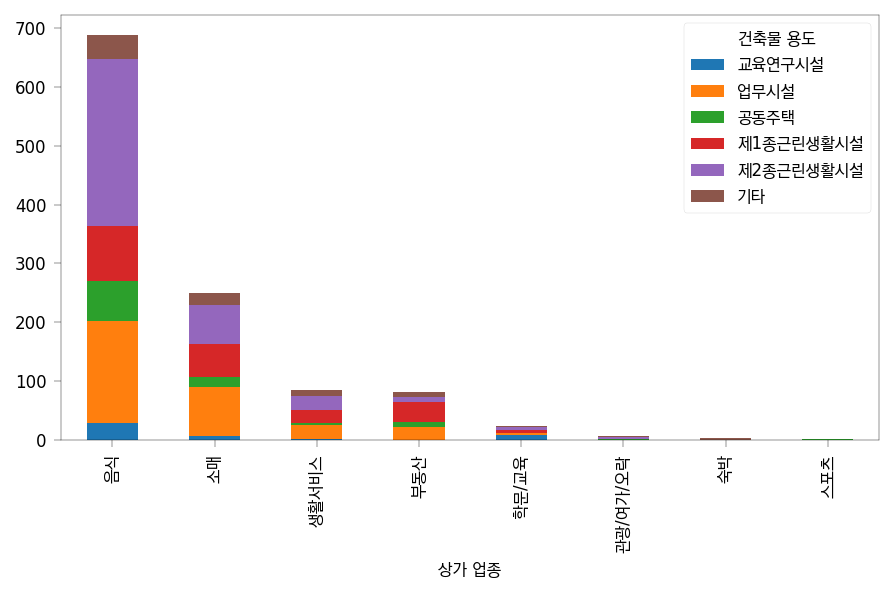

In [107]:
pv.plot.bar(stacked=True)

plt.tight_layout()

plt.savefig("output/retail/business_building.svg", bbox_inches="tight")
plt.savefig("output/retail/business_building.png", bbox_inches="tight")


연구 대상지의 상가 업종 분포는 음식업, 소매업, 생활서비스업, 부동산업 순으로 나타났다.

각 업종별로 상가가 입주한 건축물 용도 분포를 분석한 결과, 차이를 보였다. 예를 들어, 음식업은 제2종 근린생활시설, 업무시설, 제1종 근린생활시설 순으로 나타났으나, 부동산업은 그 반대 순서인 반대로 제1종 근린생활시설, 업무시설 순으로 나타나는 등,

In [108]:
df.useapr_yr.describe()


count    1132.000000
mean     1998.230565
std        11.763091
min      1972.000000
25%      1989.000000
50%      2000.000000
75%      2007.000000
max      2021.000000
Name: useapr_yr, dtype: float64

In [109]:
df.groupby("상가 업종").useapr_yr.count()


상가 업종
관광/여가/오락      6
부동산          82
생활서비스        84
소매          248
숙박            3
스포츠           1
음식          684
학문/교육        24
Name: useapr_yr, dtype: int64

In [133]:
df.groupby("상가 업종").useapr_yr.mean()


상가 업종
관광/여가/오락    1992.000000
부동산         1995.207317
생활서비스       1998.369048
소매          1998.411290
숙박          2012.000000
스포츠         2004.000000
음식          1998.552632
학문/교육       1996.625000
Name: useapr_yr, dtype: float64

In [134]:
df.groupby("상가 업종").useapr_yr.median()


상가 업종
관광/여가/오락    1992.0
부동산         1995.5
생활서비스       2001.5
소매          2002.0
숙박          2017.0
스포츠         2004.0
음식          2000.5
학문/교육       1996.5
Name: useapr_yr, dtype: float64

In [111]:
pd.cut(
    df.useapr_yr, [np.NINF, 1970, 1980, 1990, 2000, 2010, np.inf], right=False
).value_counts(sort=False)


[-inf, 1970.0)        0
[1970.0, 1980.0)    103
[1980.0, 1990.0)    202
[1990.0, 2000.0)    256
[2000.0, 2010.0)    373
[2010.0, inf)       198
Name: useapr_yr, dtype: int64

In [112]:
df["연대"] = pd.cut(
    df.useapr_yr, [np.NINF, 1970, 1980, 1990, 2000, 2010, np.inf], right=False
)
df.연대


0       [2000.0, 2010.0)
1       [2000.0, 2010.0)
2                    NaN
3                    NaN
4                    NaN
              ...       
1181       [2010.0, inf)
1182    [1990.0, 2000.0)
1183                 NaN
1184                 NaN
1185                 NaN
Name: 연대, Length: 1186, dtype: category
Categories (6, interval[float64, left]): [[-inf, 1970.0) < [1970.0, 1980.0) < [1980.0, 1990.0) < [1990.0, 2000.0) < [2000.0, 2010.0) < [2010.0, inf)]

In [113]:
pv2 = (
    df.pivot_table("code3", "상가 업종", "연대", "count", margins=True)
    .sort_values("All", ascending=False)
    .drop(columns="All")
    # .sort_values("All", ascending=False, axis=1)
    .drop(index="All")
)

# pv2.columns = pv2.columns.rename("건축물 용도")
# purp_names = {
#     "4000": "제2종근린생활시설",
#     "14000": "업무시설",
#     "3000": "제1종근린생활시설",
#     "2000": "공동주택",
#     "10000": "교육연구시설",
# }
# pv.index = pv.index.rename("상가 업종")
# pv2 = pv2.rename(index=retail_names, columns=purp_names)
pv2 = pv2.fillna(0).astype(int)
pv2


연대,"[-inf, 1970.0)","[1970.0, 1980.0)","[1980.0, 1990.0)","[1990.0, 2000.0)","[2000.0, 2010.0)","[2010.0, inf)"
상가 업종,,,,,,
음식,0,41,132,163,232,116
소매,0,15,48,56,88,41
생활서비스,0,11,13,17,26,17
부동산,0,33,2,10,19,18
학문/교육,0,3,5,7,5,4
관광/여가/오락,0,0,2,3,1,0
숙박,0,0,0,0,1,2
스포츠,0,0,0,0,1,0


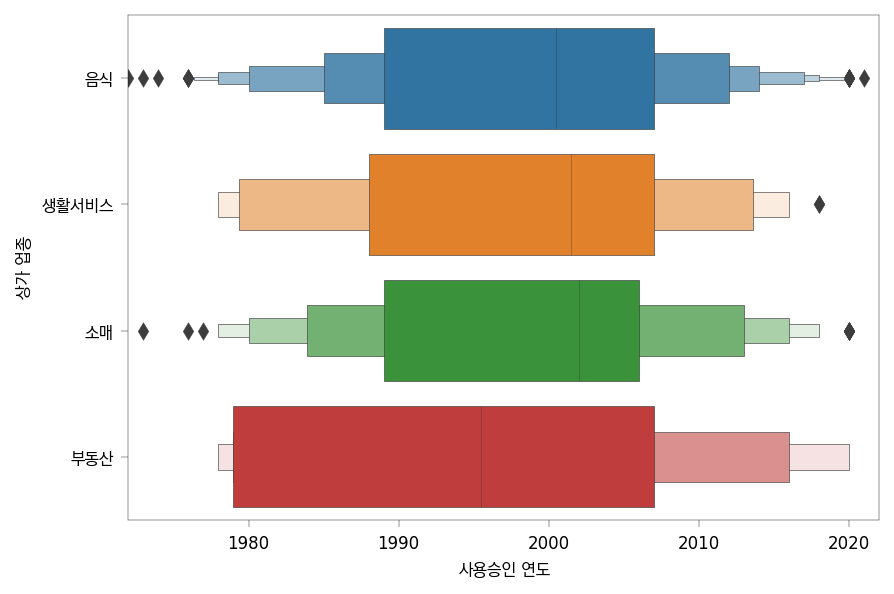

In [114]:
sns.boxenplot(
    data=df[df.code1.isin(["D", "F", "L", "Q"])],
    x="useapr_yr",
    y="상가 업종",
    orient="h",
)
plt.xlabel("사용승인 연도")
plt.xlim(1972, 2022)

plt.tight_layout()

plt.savefig("output/retail/business_useapr-year.svg", bbox_inches="tight")
plt.savefig("output/retail/business_useapr-year.png", bbox_inches="tight")


부동산업은 더 오래된 건물에 많이 분포하고 있다

각 업종별로 상가가 입주한 건축물의 준공연도 분포 분석에는 상자 그림(box plot)을 확장하여 1사분위수와 3사분위수 밖의 분포를 수염 대신 재귀적인 상자로 표현하는 박슨 플롯(boxen plot)을 사용하였다. 분석 결과, 음식업, 생활서비스업, 소매업은 모두 1990년대~2000년대 초중반을 중심으로 대칭적인 분포를 보였으나, 부동산업의 경우 1980년대 준공된 건축물에도 많이 입주한 치우친 분포를 나타내었다.

In [115]:
df[df["상가 업종"] == "숙박"]


,TARGET_FID,BIGO,Bigo_bd,PK,MAIN_PURPS,ETC_PURPS,name_comb,code_comb,code3,code1,useapr_yr,top_purps,상가 업종,연대
40,42,NaN,NaN,11650-100255714,15000,관광호텔,신라스테이,O01A01,O01,O,2017.0,기타,숙박,"[2010.0, inf)"
109,119,NaN,NaN,11650-100266288,15000,호텔,토요코인서울강남,O01A01,O01,O,2018.0,기타,숙박,"[2010.0, inf)"
748,792,NaN,NaN,11680-23133,15000,숙박시설,호텔시애틀,O02A01,O02,O,2001.0,기타,숙박,"[2000.0, 2010.0)"


In [116]:
# 5-nearest in 20 m radius
df_pair = pd.read_csv("data/retail/retail_neighbor.csv")
df_pair = df_pair.rename(columns={"nearestc_1": "n_code3", "nearestc_2": "n_code1"})


In [117]:
retail_names = {
    "D": "소매",
    "F": "생활서비스",
    "L": "부동산",
    "N": "관광/여가/오락",
    "O": "숙박",
    "P": "스포츠",
    "Q": "음식",
    "R": "학문/교육",
}

df_pair["상가1 업종"] = df_pair.code1.replace(retail_names)
df_pair["상가2 업종"] = df_pair.n_code1.replace(retail_names)
df_pair


,name_comb,code3,code1,nearestnam,n_code3,n_code1,n,distance,상가1 업종,상가2 업종
0,토말세꼬시,Q03,Q,황해도왕족발찹쌀순대,Q01,Q,2,18.384031,음식,음식
1,한성양꼬치,Q09,Q,나주곰탕본가,Q01,Q,3,16.250019,음식,음식
2,강남곱,Q01,Q,한성양꼬치,Q09,Q,1,9.624526,음식,음식
3,강남곱,Q01,Q,강남시소,Q01,Q,2,12.724278,음식,음식
4,강남곱,Q01,Q,재이앤지에스25역삼아워홈점,D03,D,3,13.361817,음식,소매
...,...,...,...,...,...,...,...,...,...,...
3189,나주곰탕본가,Q01,Q,한성양꼬치,Q09,Q,2,16.250019,음식,음식
3190,강남시소,Q01,Q,한성양꼬치,Q09,Q,1,3.425670,음식,음식
3191,투시스강남본점,Q12,Q,청담등심,Q01,Q,2,17.049243,음식,음식
3192,촌장골감자탕,Q01,Q,토말세꼬시,Q03,Q,1,13.648181,음식,음식


In [118]:
pv = (
    df_pair.pivot_table("code1", "상가1 업종", "상가2 업종", "count", margins=True)
    .sort_values("All", ascending=False)
    .drop(columns="All")
    .sort_values("All", ascending=False, axis=1)
    .drop(index="All")
)
pv = pv.fillna(0)
pv = pv.astype(int)
pv


상가2 업종,음식,소매,부동산,생활서비스,학문/교육,관광/여가/오락,숙박,스포츠
상가1 업종,,,,,,,,
음식,1321,341,97,107,18,13,1,1
소매,343,195,60,53,10,6,1,0
부동산,99,63,113,34,4,2,0,0
생활서비스,108,54,31,48,6,1,0,0
학문/교육,18,11,2,6,2,0,0,0
관광/여가/오락,13,6,2,1,0,0,0,0
숙박,1,1,0,0,0,0,0,0
스포츠,1,0,0,0,0,0,0,0


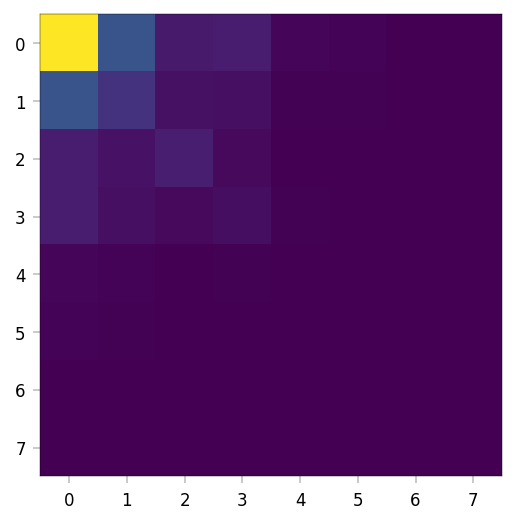

In [119]:
plt.imshow(pv)


In [120]:
cnt = df["상가 업종"].value_counts()
cnt


음식          713
소매          261
부동산          88
생활서비스        87
학문/교육        25
관광/여가/오락      7
숙박            3
스포츠           2
Name: 상가 업종, dtype: int64

In [121]:
for idx in cnt.index:
    pv.loc[idx] = pv.loc[idx] / cnt[idx]


In [122]:
pv


상가2 업종,음식,소매,부동산,생활서비스,학문/교육,관광/여가/오락,숙박,스포츠
상가1 업종,,,,,,,,
음식,1.852735,0.478261,0.136045,0.150070,0.025245,0.018233,0.001403,0.001403
소매,1.314176,0.747126,0.229885,0.203065,0.038314,0.022989,0.003831,0.000000
부동산,1.125000,0.715909,1.284091,0.386364,0.045455,0.022727,0.000000,0.000000
생활서비스,1.241379,0.620690,0.356322,0.551724,0.068966,0.011494,0.000000,0.000000
학문/교육,0.720000,0.440000,0.080000,0.240000,0.080000,0.000000,0.000000,0.000000
관광/여가/오락,1.857143,0.857143,0.285714,0.142857,0.000000,0.000000,0.000000,0.000000
숙박,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
스포츠,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


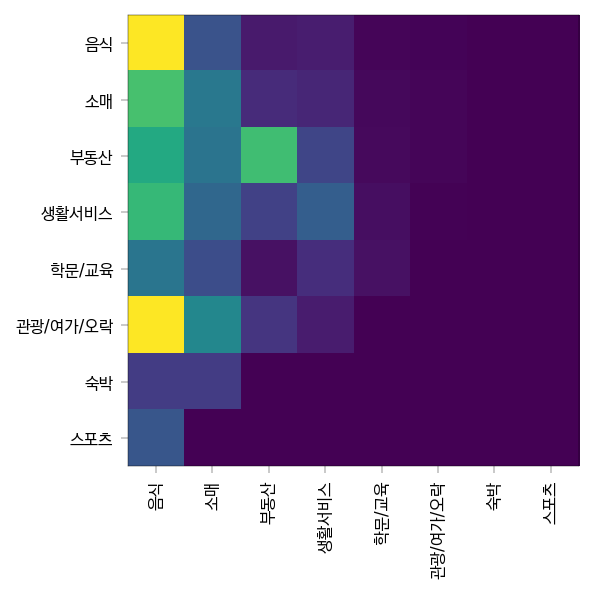

In [123]:
plt.imshow(pv)
plt.xticks(range(8), pv.index, rotation=90)
plt.yticks(range(8), pv.index)

plt.tight_layout()

plt.savefig("output/retail/near_business.svg", bbox_inches="tight")
plt.savefig("output/retail/near_business.png", bbox_inches="tight")


In [124]:
df_food = df_pair[(df_pair.code1 == "Q") & (df_pair.n_code1 == "Q")].copy()

food_names = {
    "Q01": "한식",
    "Q02": "중식",
    "Q03": "일식/수산물",
    "Q04": "분식",
    "Q05": "닭/오리요리",
    "Q06": "양식",
    "Q07": "패스트푸드",
    "Q08": "제과제빵떡케익",
    "Q09": "유흥주점",
    "Q10": "별식/퓨전요리",
    "Q12": "커피점/카페",
    "Q13": "음식배달서비스",
    "Q14": "기타음식업",
    "Q15": "부페",
}

df_food["음식1 업종"] = df_food.code3.replace(food_names)
df_food["음식2 업종"] = df_food.n_code3.replace(food_names)
df_food


,name_comb,code3,code1,nearestnam,n_code3,n_code1,n,distance,상가1 업종,상가2 업종,음식1 업종,음식2 업종
0,토말세꼬시,Q03,Q,황해도왕족발찹쌀순대,Q01,Q,2,18.384031,음식,음식,일식/수산물,한식
1,한성양꼬치,Q09,Q,나주곰탕본가,Q01,Q,3,16.250019,음식,음식,유흥주점,한식
2,강남곱,Q01,Q,한성양꼬치,Q09,Q,1,9.624526,음식,음식,한식,유흥주점
3,강남곱,Q01,Q,강남시소,Q01,Q,2,12.724278,음식,음식,한식,한식
5,강남시소,Q01,Q,강남곱,Q01,Q,2,12.724278,음식,음식,한식,한식
...,...,...,...,...,...,...,...,...,...,...,...,...
3189,나주곰탕본가,Q01,Q,한성양꼬치,Q09,Q,2,16.250019,음식,음식,한식,유흥주점
3190,강남시소,Q01,Q,한성양꼬치,Q09,Q,1,3.425670,음식,음식,한식,유흥주점
3191,투시스강남본점,Q12,Q,청담등심,Q01,Q,2,17.049243,음식,음식,커피점/카페,한식
3192,촌장골감자탕,Q01,Q,토말세꼬시,Q03,Q,1,13.648181,음식,음식,한식,일식/수산물


In [125]:
pv = (
    df_food.pivot_table("code1", "음식1 업종", "음식2 업종", "count", margins=True)
    .sort_values("All", ascending=False)
    .drop(columns="All")
    .sort_values("All", ascending=False, axis=1)
    .drop(index="All")
)
pv = pv.fillna(0)
pv = pv.astype(int)
pv


음식2 업종,한식,커피점/카페,유흥주점,일식/수산물,분식,양식,패스트푸드,별식/퓨전요리,닭/오리요리,중식,제과제빵떡케익,부페,기타음식업
음식1 업종,,,,,,,,,,,,,
한식,116,70,48,38,33,23,10,10,10,7,2,1,2
커피점/카페,68,81,17,25,33,19,19,12,1,6,5,0,1
유흥주점,49,18,22,11,8,3,6,6,6,2,0,3,0
일식/수산물,40,26,10,10,8,8,5,5,3,2,2,1,1
분식,33,36,8,8,7,5,7,3,5,2,4,0,0
양식,25,17,3,7,4,20,4,3,5,1,6,0,0
패스트푸드,8,17,6,5,8,4,4,1,1,1,2,0,0
별식/퓨전요리,10,12,6,5,3,3,1,0,1,1,1,1,0
닭/오리요리,11,1,6,3,5,5,1,1,0,2,0,1,0


In [126]:
cnt = df[df.code1 == "Q"]["code3"].value_counts().to_frame()
cnt = cnt.reset_index()
cnt["index"] = cnt["index"].replace(food_names)
cnt = cnt.set_index("index").code3
cnt


index
한식         183
커피점/카페     170
유흥주점        68
일식/수산물      61
분식          55
양식          55
패스트푸드       42
닭/오리요리      23
별식/퓨전요리     20
제과제빵떡케익     18
중식          14
기타음식업        2
부페           2
Name: code3, dtype: int64

In [127]:
for idx in cnt.index:
    pv.loc[idx] = pv.loc[idx] / cnt[idx]


In [128]:
pv.iloc[0:-2, 0:-2]


음식2 업종,한식,커피점/카페,유흥주점,일식/수산물,분식,양식,패스트푸드,별식/퓨전요리,닭/오리요리,중식,제과제빵떡케익
음식1 업종,,,,,,,,,,,
한식,0.633880,0.382514,0.262295,0.207650,0.180328,0.125683,0.054645,0.054645,0.054645,0.038251,0.010929
커피점/카페,0.400000,0.476471,0.100000,0.147059,0.194118,0.111765,0.111765,0.070588,0.005882,0.035294,0.029412
유흥주점,0.720588,0.264706,0.323529,0.161765,0.117647,0.044118,0.088235,0.088235,0.088235,0.029412,0.000000
일식/수산물,0.655738,0.426230,0.163934,0.163934,0.131148,0.131148,0.081967,0.081967,0.049180,0.032787,0.032787
분식,0.600000,0.654545,0.145455,0.145455,0.127273,0.090909,0.127273,0.054545,0.090909,0.036364,0.072727
양식,0.454545,0.309091,0.054545,0.127273,0.072727,0.363636,0.072727,0.054545,0.090909,0.018182,0.109091
패스트푸드,0.190476,0.404762,0.142857,0.119048,0.190476,0.095238,0.095238,0.023810,0.023810,0.023810,0.047619
별식/퓨전요리,0.500000,0.600000,0.300000,0.250000,0.150000,0.150000,0.050000,0.000000,0.050000,0.050000,0.050000
닭/오리요리,0.478261,0.043478,0.260870,0.130435,0.217391,0.217391,0.043478,0.043478,0.000000,0.086957,0.000000


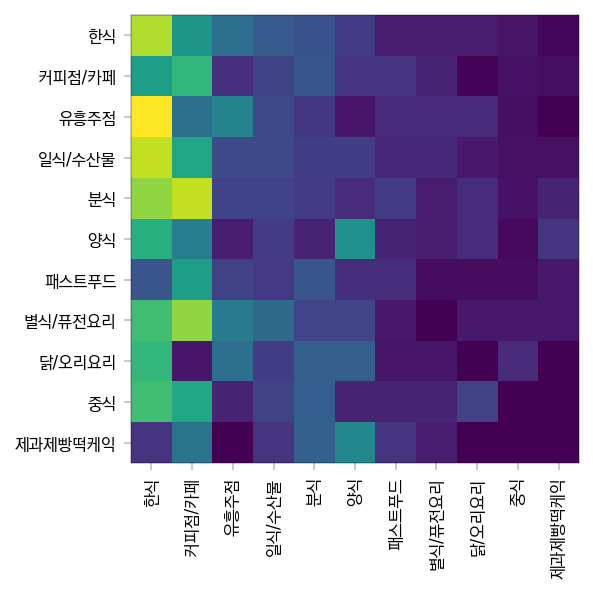

In [129]:
plt.imshow(pv.iloc[:-2, :-2])
plt.xticks(range(11), pv.index[:-2], rotation=90)
plt.yticks(range(11), pv.index[:-2])

plt.tight_layout()

plt.savefig("output/retail/near_food.svg", bbox_inches="tight")
plt.savefig("output/retail/near_food.png", bbox_inches="tight")
plt.show()


In [130]:
df.head()

,TARGET_FID,BIGO,Bigo_bd,PK,MAIN_PURPS,ETC_PURPS,name_comb,code_comb,code3,code1,useapr_yr,top_purps,상가 업종,연대
0,0,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),배스킨라빈스,Q07A07,Q07,Q,2007.0,14000,음식,"[2000.0, 2010.0)"
1,1,NaN,NaN,11650-14342,14000,업무시설(근린생활시설),파리바게뜨,Q08A01,Q08,Q,2007.0,14000,음식,"[2000.0, 2010.0)"
2,2,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",청담동마녀김밥,Q04A01,Q04,Q,NaN,14000,음식,NaN
3,3,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",디헤어바이제이,F01A01,F01,F,NaN,14000,생활서비스,NaN
4,4,NaN,NaN,11650-14337,14000,"업무시설, 근린생활시설, 위락시설",세븐일레븐서초행복점,D03A01,D03,D,NaN,14000,소매,NaN


In [131]:
df.code_comb.value_counts()

Q12A01    166
Q01A01    101
L01A01     77
D03A01     68
Q01A02     39
         ... 
R07A10      1
R08A03      1
D08A02      1
D01A08      1
F13A13      1
Name: code_comb, Length: 175, dtype: int64